# Assignment-11-Text_Mining_Elon_Musk_DataSet

For Text Mining assignment<br/>
 
 ONE:<br/>
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)<br/>

## 1. Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

## 2. Import Dataset

In [2]:
# Loading dataset
data = pd.read_csv('Elon_musk.csv',encoding="latin-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## 3. EDA

In [3]:
data.shape

(1999, 2)

In [4]:
# Dropping additional index column 'Unnamed'
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


## 4. Remove both the leading and the trailing character


In [5]:
data= [Text.strip() for Text in data.Text]

## 5. Removing empty strings



In [6]:
data = [x for x in data if x]
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
Tweet_wordcloud = ' '.join(data)

## Tokenization

In [8]:
# Tokenizing based on sentences (wherever fullstop considers new sentence)
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chetana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [9]:
# Converting tokenized sentences into Dataframe
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


## Stopword removal


In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chetana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
sent_df['no_stop_sentence'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))
sent_df.head()

,sentence,no_stop_sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!


## Removing punctuations

In [13]:
sent_df['clean'] = sent_df['no_stop_sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))
sent_df.head()

,sentence,no_stop_sentence,clean
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!


In [14]:
sent_df=sent_df.drop(['sentence','no_stop_sentence'],axis=1)
sent_df.head()

,clean
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!


In [15]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [16]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [17]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [18]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [19]:
#Custom function :score each word in a sentence in lemmatised form, but calculate the score for the whole sentence.

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [20]:
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)
sent_df.head()

,clean,sentiment_value
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0
1,Have tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge underestimated @teslacn Congratu...,3
4,Now next even more!!,0


In [21]:
#word count for "clean"column
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     3
2     4
3    11
4     4
5     4
6     9
7    10
8     6
9    74
Name: word_count, dtype: int64

In [22]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,-8,41
64,"Also, road hell mostly paved bad intentions.",-7,7
611,"Then static fire, checkouts, static fire, fly ...",-4,11
920,"It may never pay out, stock cant b https://t....",-4,21
680,"Occasional flights land ok, frequent (daily) f...",-4,26
887,Will write algorithms ever realize negativity ...,-3,7
23,https://t.co/UEEocOfcTb The people spoken http...,-3,30
886,This primarily electrical/electronic (chip des...,-3,60
219,@RGVaerialphotos It real soon @MarcusHouseGame...,-3,13
816,"Connector damaged storm, fixed now.",-3,5


In [23]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.416667
std        2.661589
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [24]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,clean,sentiment_value,word_count
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9
1,Have tried it?,0,3
4,Now next even more!!,0,4
5,Happy New Year Ox!,0,4
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",-2,9


In [25]:
sent_df[sent_df['sentiment_value']>=10].head()

,clean,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, engi...",16,171
81,@teslaownersSV This good one @MrBeastYT I whis...,13,30
105,@Erdayastronaut @SpaceX Was also thinking Spac...,16,66
151,"@GUNMTLM3 @lexfridman No, definitely year @lex...",10,33
159,@harsimranbansal @heydave7 It likely make sens...,11,68


In [26]:
sent_df['index']=range(0,len(sent_df))
sent_df.head()

,clean,sentiment_value,word_count,index
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4


# WordCloud


In [27]:
from wordcloud import WordCloud, STOPWORDS

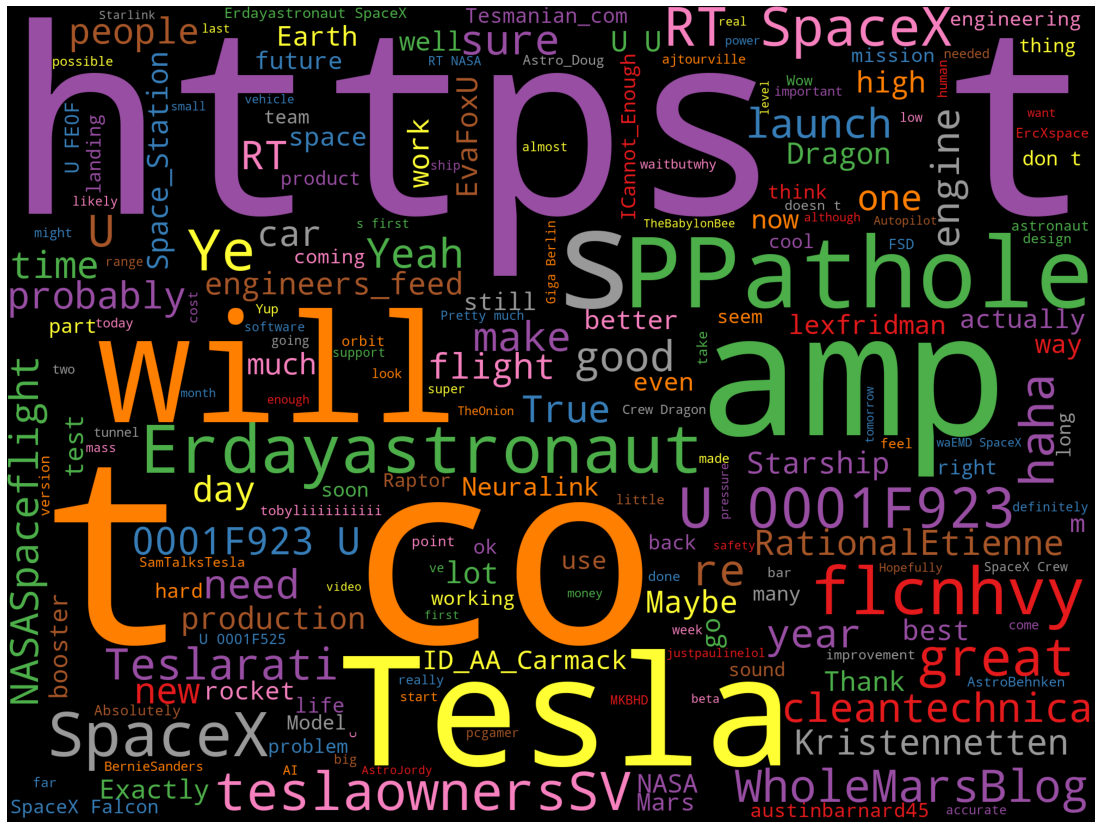

In [28]:
stopwords = STOPWORDS
wordcloud = WordCloud(width =2000, height = 1500,background_color='black',colormap='Set1',stopwords=stopwords).generate(Tweet_wordcloud)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud)
plt.axis('off');


# Visualization of sentiment scores


C:\Users\Chetana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


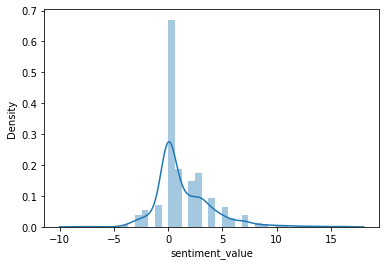

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution plot
sns.distplot(sent_df['sentiment_value']);

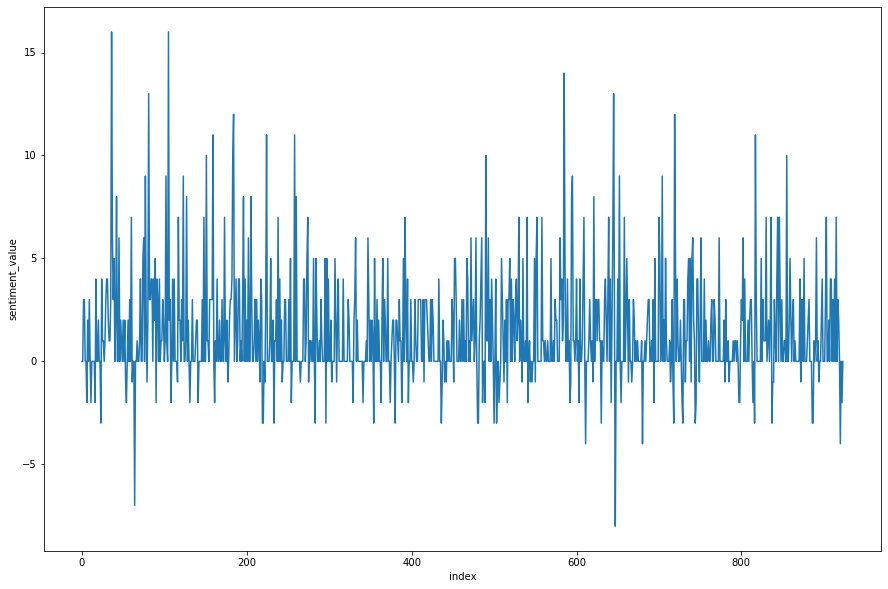

In [30]:
#Line plot
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

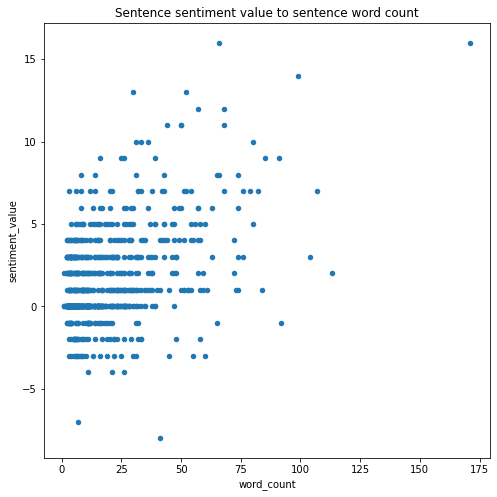

In [31]:
#Scatter plot between 'Sentiment value' and 'word count'
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');


In [32]:
from textblob import TextBlob

In [33]:
sent_df[['polarity', 'subjectivity']] = sent_df['clean'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [34]:
TextBlob(sent_df['clean'][2]).sentiment
sent_df.head()

,clean,sentiment_value,word_count,index,polarity,subjectivity
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0,-0.250000,0.750000
1,Have tried it?,0,3,1,0.000000,0.000000
2,@joerogan @Spotify Great interview!,3,4,2,1.000000,0.750000
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3,0.300000,0.483333
4,Now next even more!!,0,4,4,0.390625,0.250000


In [35]:
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Chetana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
for index, row in sent_df['clean'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        sent_df.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        sent_df.loc[index, 'sentiment'] = 'positive'
    else:
        sent_df.loc[index, 'sentiment'] = 'neutral'
    sent_df.loc[index, 'neg'] = neg
    sent_df.loc[index, 'neu'] = neu
    sent_df.loc[index, 'pos'] = pos
    sent_df.loc[index, 'compound'] = comp

In [37]:
x=SentimentIntensityAnalyzer().polarity_scores(sent_df['clean'][2])

In [38]:
x=SentimentIntensityAnalyzer().polarity_scores(sent_df['clean'][4])
#{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}
#x['pos']
sent_df['clean'][4]

'Now next even more!!'

In [39]:
x

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [40]:
sent_df.head()

,clean,sentiment_value,word_count,index,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0,-0.250000,0.750000,neutral,0.000,1.000,0.000,0.0000
1,Have tried it?,0,3,1,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,@joerogan @Spotify Great interview!,3,4,2,1.000000,0.750000,positive,0.000,0.406,0.594,0.6588
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3,0.300000,0.483333,positive,0.118,0.449,0.433,0.7650
4,Now next even more!!,0,4,4,0.390625,0.250000,neutral,0.000,1.000,0.000,0.0000


In [41]:
list_positive = sent_df[sent_df['sentiment']== 'positive']
list_negative = sent_df[sent_df['sentiment']== 'negative']
list_neutral = sent_df[sent_df['sentiment']== 'neutral']
data1 = pd.DataFrame(list_positive, list_negative, list_neutral)

In [42]:
def count_values_in_column(data1,feature):
 total=data1.loc[:,feature].value_counts(dropna=False)
 percentage=round(data1.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(sent_df,'sentiment')

,Total,Percentage
positive,543,58.77
neutral,283,30.63
negative,98,10.61


In [43]:
y = count_values_in_column(sent_df, 'sentiment')
y['Percentage']

positive    58.77
neutral     30.63
negative    10.61
Name: Percentage, dtype: float64

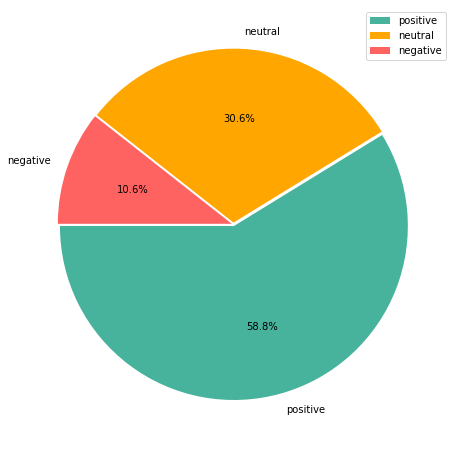

In [44]:
import matplotlib.pyplot as plt
y=count_values_in_column(sent_df, 'sentiment')
y=y['Total']
plt.figure(figsize=(8,8))
mylabels = ['positive', 'neutral','negative']

plt.pie(y, labels = mylabels, startangle=180, colors=['#47B39C', '#ffa600','#ff6361'], autopct='%1.1f%%', explode=[0.01,0.01,0.01])
plt.legend()
plt.show()

<AxesSubplot:xlabel='sentiment', ylabel='count'>

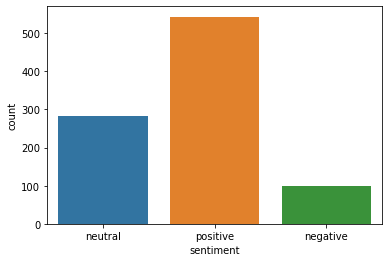

In [45]:
sns.countplot(x = 'sentiment', data = sent_df)

**Inference : We can conclude that positive tweets are more as compared to negative.**